In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:
def scrape_books(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    books = []

    for book in soup.find_all('article', class_='product_pod'):
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text[2:]  # Remove currency symbol
        rating = book.p['class'][1]
        books.append({'Title': title, 'Price': float(price), 'Rating': rating})

    return pd.DataFrame(books)

url = 'http://books.toscrape.com/catalogue/category/books/science_22/index.html'
books_df = scrape_books(url)
print(books_df.head())


                                               Title  Price Rating
0  The Most Perfect Thing: Inside (and Outside) a...  42.96   Four
1  Immunity: How Elie Metchnikoff Changed the Cou...  57.36   Five
2  Sorting the Beef from the Bull: The Science of...  44.74   Four
3  Tipping Point for Planet Earth: How Close Are ...  37.55    One
4  The Fabric of the Cosmos: Space, Time, and the...  55.91    One


In [ ]:
# Convert rating to numerical values
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
books_df['Rating'] = books_df['Rating'].map(rating_map)

# Check for and handle missing values
books_df.dropna(inplace=True)


In [ ]:
# Analyze the price distribution
price_stats = books_df['Price'].describe()
print(price_stats)

# Analyze the rating distribution
rating_counts = books_df['Rating'].value_counts()
print(rating_counts)


count    14.000000
mean     33.088571
std      16.725702
min      10.010000
25%      18.667500
50%      30.025000
75%      44.295000
max      57.360000
Name: Price, dtype: float64
Rating
4    5
1    4
5    2
2    2
3    1
Name: count, dtype: int64


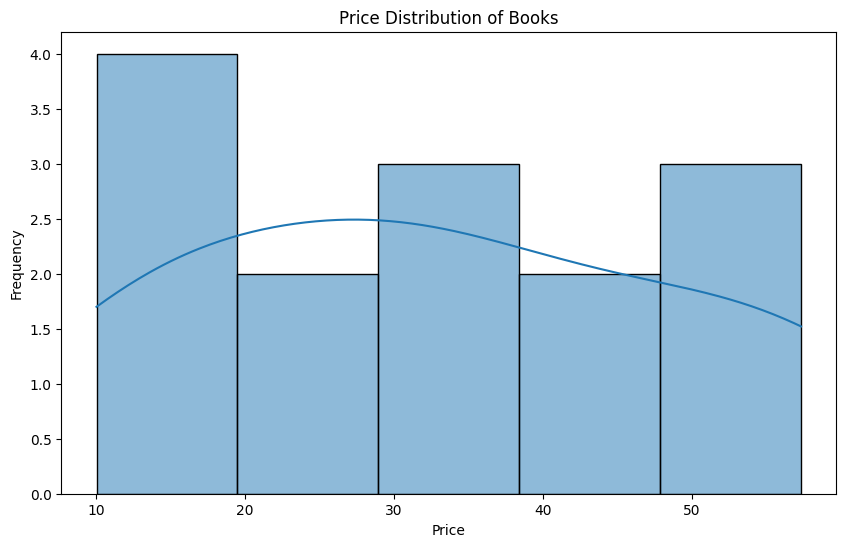

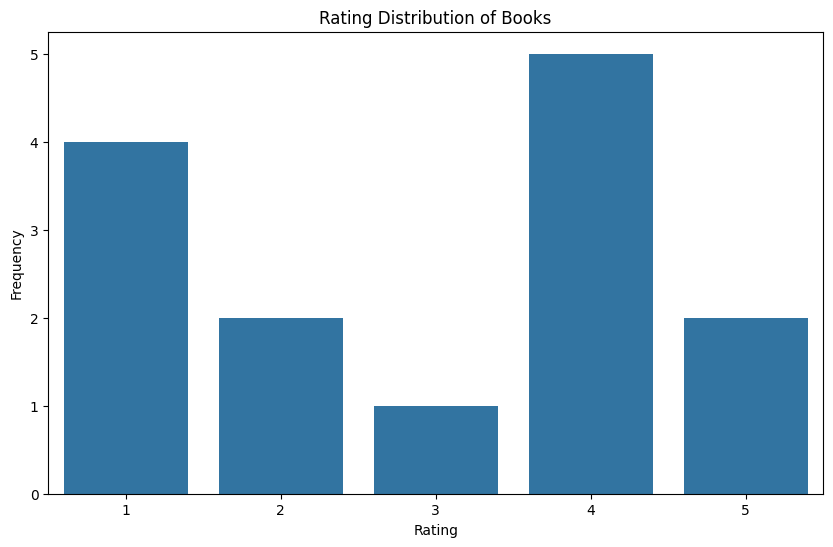

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(books_df['Price'], kde=True)
plt.title('Price Distribution of Books')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=books_df, order=sorted(books_df['Rating'].unique()))
plt.title('Rating Distribution of Books')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()